In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [19]:
dados = pd.read_csv(r'C:\Projetos Data Science\Detecção de Fraude no Cartão de Crédito\Dados\creditcard.csv')

In [20]:
# <-- ANÁLISE EXPLOCRATÓRIA DOS DADOS
# -> nº de Operações Fraudulentas e Normais
n_normais = len(dados[dados.Class == 0])
n_fraudes = len(dados[dados.Class == 1])
print('Nº de Operações Normais:', n_normais)
print('Nº de Operações Fraudulentas:', n_fraudes)

Nº de Operações Normais: 284315
Nº de Operações Fraudulentas: 492


In [21]:
# <-- REAMOSTRAGEM DOS DADOS
# -> Estratificação da Amostra
operacoes_normais = np.array(np.random.choice(dados[dados.Class == 0].index, n_fraudes, replace=False))
operacoes_fraudulentas = np.array(dados[dados.Class == 1].index)
amostra_indice = np.concatenate([operacoes_normais, operacoes_fraudulentas])
amostra = dados.iloc[amostra_indice, :]

In [22]:
# <-- SEPARAÇÂO DOS DADOS (AMOSTRA)
previsores_amostra = amostra.loc[:, amostra.columns != 'Class'].values
classe_amostra = amostra.loc[:, amostra.columns == 'Class'].values

In [23]:
# <-- DIVIDINDO OS DADOS EM TREINO E TESTE (AMOSTRA)(70%/30%)
X_treinamento_amostra, X_teste_amostra, y_treinamento_amostra, y_teste_amostra = train_test_split(previsores_amostra,
                                                                                                    classe_amostra,
                                                                                                    test_size=0.30,
                                                                                                    random_state=0)
X_teste_amostra   

array([[ 6.48910000e+04, -8.21841919e-01,  7.11583431e-01, ...,
        -1.57554910e-01,  5.04766412e-02,  1.50400000e+01],
       [ 1.20930000e+04, -4.69679522e+00,  2.69386748e+00, ...,
        -1.50845793e+00,  6.08074683e-01,  0.00000000e+00],
       [ 8.16390000e+04,  1.02752834e+00, -1.31872531e-02, ...,
         2.46083405e-02,  1.36196412e-02,  4.94500000e+01],
       ...,
       [ 1.49096000e+05,  1.18489112e+00,  3.15208421e+00, ...,
         4.85186935e-01,  3.26551572e-01,  0.00000000e+00],
       [ 1.46022000e+05,  9.08636658e-01,  2.84902401e+00, ...,
         6.48704799e-01,  3.60224330e-01,  1.18000000e+00],
       [ 7.51900000e+03,  1.23423505e+00,  3.01974042e+00, ...,
        -1.00162235e-02,  1.46792735e-01,  1.00000000e+00]])

In [24]:
# <-- CRIAÇÃO E TREINAMENTO DO MODELO
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento_amostra, y_treinamento_amostra)

DecisionTreeClassifier()

In [25]:
# <-- PREVISÕES ATRAVÉS DOS DADOS TESTES
previsao = arvore.predict(X_teste_amostra)
previsao

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [26]:
# <-- GERANDO DADOS PARA AVALIAÇÃO DO MODELO
matrix_confusao = confusion_matrix(y_teste_amostra, previsao)
vp = matrix_confusao[0][0]
fp = matrix_confusao[0][1]
vn = matrix_confusao[1][1]
fn = matrix_confusao[1][0]

In [27]:
# <-- ACURÁCIA DO MODELO
taxa_acerto = accuracy_score(y_teste_amostra, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.8918918918918919

In [28]:
# <-- PRECISÃO DO MODELO
precisao = vp/(vp+fp)
precisao

0.9183673469387755

In [29]:
# <-- RECALL DO MODELO
recall = vp /(vp+fn)
recall

0.8709677419354839

In [30]:
# <-- ESPCIFICIDADE DO MODELO
especificidade = vn / (fp + vn)
especificidade

0.9148936170212766

In [31]:
# <-- F-SCORE DO MODELO
f_score = (2 * (precisao * recall)) / (precisao + recall)
f_score

0.8940397350993378

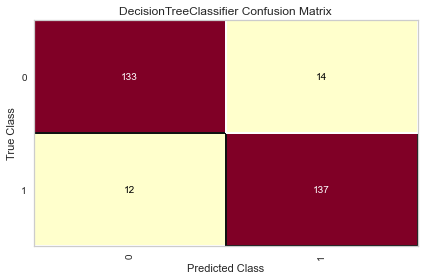

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# VISUALIZAÇÃO DA MATRIX DE CONFUSÃO
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento_amostra, y_treinamento_amostra)
v.score(X_teste_amostra, y_teste_amostra)
v.poof()